In [2]:
#importing data set
df = pd.read_csv("heart.csv")
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# Taking care of missiong values


In [4]:
# Taking care of duplicate values
df.duplicated().any


<bound method NDFrame._add_numeric_operations.<locals>.any of 0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool>

In [5]:
# droping duplicate values
df = df.drop_duplicates()

# rechecking for duplicate values
df.duplicated().any()


False

In [6]:
# pre processing
cat_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique() <= 10:
        cat_val.append(column)
    else:
        cont_val.append(column)

print("Categorical-->",cat_val)
print("Continuous-->",cont_val)

Categorical--> ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous--> ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [7]:
# Encoding Categorical Data
cat_val

# Checking for the need of encoding
print(df.cp.unique())
print(df.exang.unique())
print(df.sex.unique())
print(df.target.unique())



[0 1 2 3]
[0 1]
[1 0]
[0 1]


In [8]:
#Removing "sex","exang" and "target" from cat_val as encoding is not required in them

cat_val.remove('sex')
cat_val.remove('target')
cat_val.remove('exang')
# dummies for'cp','fbc','restecg','slope','ca','thal'
df = pd.get_dummies(df,columns=cat_val,drop_first=True)

In [9]:
df.head()

,age,sex,trestbps,chol,thalach,exang,oldpeak,target,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,0,1.0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,1,3.1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,1,2.6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0.0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,0,1.9,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [10]:
# feature Scalling
df.head()

,age,sex,trestbps,chol,thalach,exang,oldpeak,target,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,0,1.0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,1,3.1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,1,2.6,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0,0.0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,0,1.9,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

df.head()

,age,sex,trestbps,chol,thalach,exang,oldpeak,target,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,0,-0.037124,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1,1.773958,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1,1.342748,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,0,-0.899544,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0,0.739054,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [12]:
#-----------------training and testing data----------------------

x = df.drop('target',axis=1)
y = df['target']


In [13]:
# Splitting of training and testing data  

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
#Applying------------ (Logistic Regression)----------------------

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)

y_pred1 = log.predict(x_test)


# Accuracy
from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred1))

Logistic Regression Accuracy: 0.7868852459016393


In [15]:
# SVC

from sklearn import svm

svm = svm.SVC()

svm.fit(x_train,y_train)
y_pred2 = svm.predict(x_test)

# Accuracy
print("Accuracy",accuracy_score(y_test,y_pred2))

Accuracy 0.8032786885245902


In [16]:
# Knn classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred3 = knn.predict(x_test)

# Accuracy
print("KNN Accuracy",accuracy_score(y_test,y_pred3))

KNN Accuracy 0.7377049180327869


C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
# checking for best k value
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred3=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred3))

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [18]:
score


[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [19]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Knn Accuracy--->",accuracy_score(y_test,y_pred))

Knn Accuracy---> 0.8032786885245902


C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3)]})
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705


C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

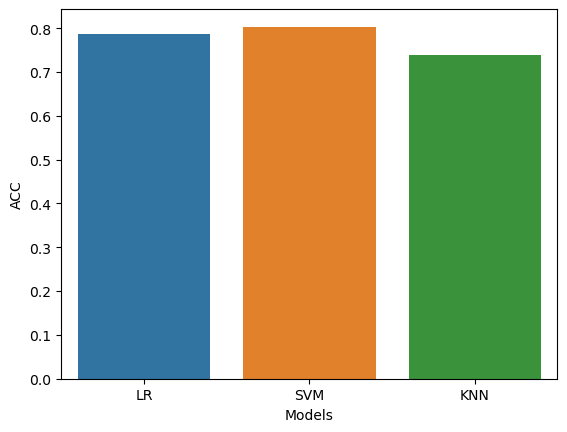

In [21]:
# Visualizing the accuracies

import seaborn as sns

sns.barplot(final_data['Models'],final_data['ACC'])

In [22]:
# Random Forest Algorithm   

data = pd.read_csv("heart.csv")
data =data.drop_duplicates()

x=data.drop('target',axis=1)
y=data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf  =RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred4 = rf.predict(x_test)

print("RF",accuracy_score(y_test,y_pred4))

RF 0.8360655737704918


C:\Users\suraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

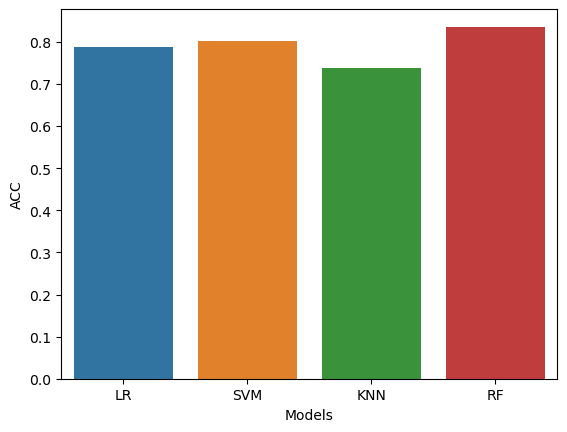

In [25]:
# Visualizing the accuracies

import seaborn as sns
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','RF'],
                           'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4)]})

sns.barplot(final_data['Models'],final_data['ACC'])


In [26]:
# As Ranforest has the best accuracy we are goint to use it for our Model

x=data.drop('target',axis=1)
y=data['target']

rf = RandomForestClassifier()
rf.fit(x,y)


RandomForestClassifier()

In [27]:
# Saving model using joblib to use in the interface
import joblib

joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [28]:
model = joblib.load('model_joblib_heart')

In [29]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
